# K-Means Clustering Step by Step 

## Import modules

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## Generate an artificial dataset
We generate two clusters for simplicity

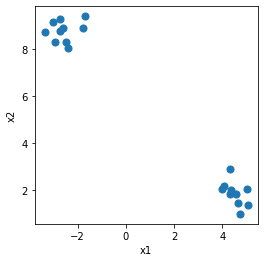

In [161]:
X, y = datasets.make_blobs(n_samples=20, 
                           n_features=2, 
                           centers=2, 
                           cluster_std=[0.5, 0.5],
                          random_state = 42)

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## K-Means Algorithm:
+ 1. Initialize the centroids randomly.
    - the number of centroids is determined by hyperparamter n_clusters
+ 2. Implement the cluster assignment step.
    - We will calculate the distance of that data from all the centroids. And then assign that data point to the centroid that has the smallest distance to it.
+ 3. move the centroids based on the mean of the data points
+ 4. Repeat steps 2 and 3 until the centroids are stable

### 1. Initialize the centroids randomly. 
We use the same strategy as KMeams in sklearn: choose n_clusters observations (rows) at random from data for the initial centroids.

In [164]:
n_clusters = 5
indices = np.random.permutation(len(X))[:2]
centroids = X[indices]
print(centroids)

[[-2.74393482  9.28556615]
 [-1.71959122  9.39800349]]


For n_clusters = 2 The average silhouette_score is : 0.6605674744184487


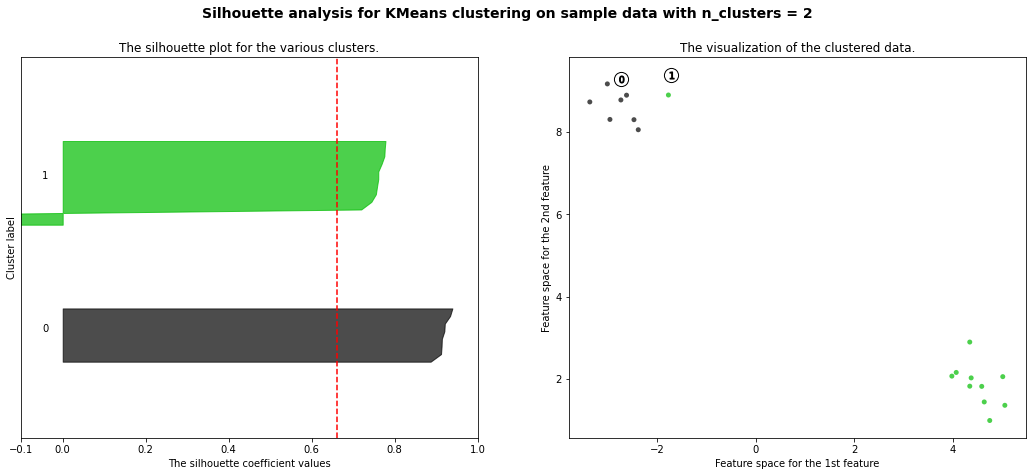

In [165]:
plot_kmeans_status(centroids, X, y=None)

## 2. Implement the cluster assignment step.
We will calculate the distance of that data from all the centroids. And then assign that data point to the centroid that has the smallest distance to it.
## 3. move the centroids based on the mean of the data points
## 4. Repeat steps 2 and 3 until the centroids are stable

In [138]:
threshold = 10**-3.

[[-2.74393482  9.28556615]
 [-1.71959122  9.39800349]] [[-2.79065562  8.69205619]
 [ 3.46751957  3.08076262]]
For n_clusters = 2 The average silhouette_score is : 0.6605674744184487


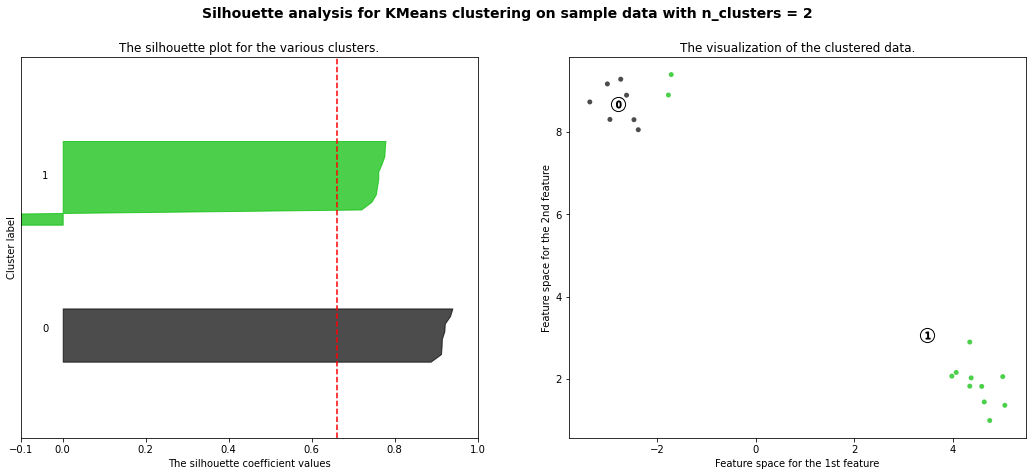

[[-2.79065562  8.69205619]
 [ 3.46751957  3.08076262]] [[-2.58212094  8.7835851 ]
 [ 4.51061993  1.86697499]]
For n_clusters = 2 The average silhouette_score is : 0.9141206959555355


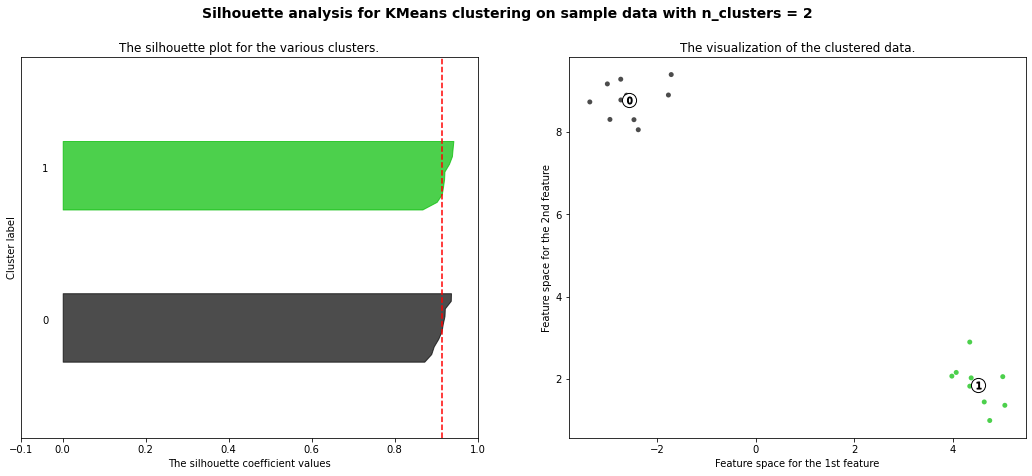

[[-2.58212094  8.7835851 ]
 [ 4.51061993  1.86697499]] [[-2.58212094  8.7835851 ]
 [ 4.51061993  1.86697499]]
For n_clusters = 2 The average silhouette_score is : 0.9141206959555355


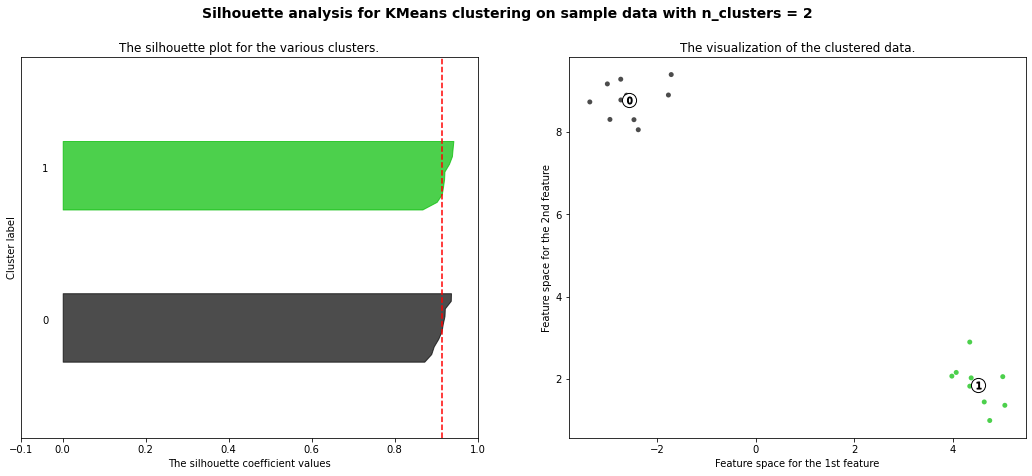

In [166]:
flag = True

while flag:
    centroids_old = np.array(centroids, copy=True)
    
    centroids, y = kmeans_update(centroids, X)
    print(centroids_old, centroids)
    plot_kmeans_status(centroids, X, y)
    
    if sum( np.linalg.norm(centroids_old-centroids, axis=1) )<threshold:
        flag = False


# Functions for KMeans

In [150]:
def kmeans_update(centroids, X):
    """
    this function update the state of a kmeans model
    input:
        centroids: the current centroids
        X: dataset for kmeans, X can only has two features
        y: the current labels
    output
        the updated centroids
        the updated labels
    """
    
    if type(X) is not np.ndarray:
        X = np.array(X)
    if type(centroids) is not np.ndarray:
        centroids = np.array(centroids)
    y=np.zeros(len(X))
    for i in range(len(X)):
        dists = np.linalg.norm(centroids - X[i], axis=1)
        y[i] = np.argmin(dists)
    
    # update labels
    if type(X) is not np.ndarray:
        X = np.array(X)
    if type(centroids) is not np.ndarray:
        centroids = np.array(centroids)
        
    for i in range(len(X)):
        dists = np.linalg.norm(centroids - X[i], axis=1)
        y[i] = np.argmin(dists)
    
    if type(y) is not np.ndarray:
        y = np.array(y)
    
    # update centroids
    for i in range(len(centroids)):
        indices = np.where(y==i)
        centroids[i] = np.mean(X[indices], axis=0)
    
    return centroids, y
    
def plot_kmeans_status(centroids, X, y=None):
    """
    this function plot the current state of a kmeans algorithm
    input:
        centroids: the current centroids
        X: dataset for kmeans, X can only has two features
        y: the current labels, if it is None, y is determined by centroids and X
    output:
        a plot
        updated centroids
        updated labels/y
    """
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    if y is None:
        y=np.zeros(len(X))
        for i in range(len(X)):
            dists = np.linalg.norm(centroids - X[i], axis=1)
            y[i] = np.argmin(dists)
    if type(y) is not np.ndarray:
        y = np.array(y)   
        
    # plot   
    for n_clusters in [len(centroids),]:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        
        cluster_labels = y
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
            
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = centroids
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        plt.show()